# Projeto Final de Data Science: Mega Sena

## Objetivos Gerais

- Entender o problema de negócio e identificar os elementos a serem considerados para o planejamento de um Modelo de Data Science.
- Descrever os dados de negócio e as relações entre dados através da Análise Exploratória de Dados.
- Escolher o algoritmo de treinamento e preparar os dados para o processo de treinamento do modelo.
- Avaliar os indicadores de desempenho preditivo do modelo e realizar otimizações.
- Elaborar uma apresentação executiva para a alta gerência, mostrando os resultados do modelo.

## Objetivos Específicos

- Desenvolver as instâncias de Data Acquisition e Data Wrangling em seu trabalho final.
- Escolher uma variável target.
- Selecionar algoritmos candidatos, definindo quais parâmetros devem ser testados com dados para cada algoritmo por meio de uma análise comparativa.

## 1. Apresentação da Empresa ou Problema Específico

Este projeto visa analisar os dados históricos da Mega Sena, uma das maiores loterias do Brasil, para identificar padrões e realizar análises estatísticas.

## 2. Perguntas e Objetivos da Pesquisa

### Perguntas:
- Quais são os padrões nos resultados da Mega Sena?
- É possível prever números futuros com base nos históricos?
- Quais números são mais frequentemente sorteados?

### Objetivos:
- Identificar padrões nos números sorteados.
- Construir modelos preditivos.
- Analisar distribuições e correlações.

## 3. Configuração da Equipe de Trabalho

| Nome            | Função                 |
|-----------------|------------------------|
| Loan Schlemmer  | Coleta de Dados        |
| Loan Schlemmer  | Análise de Dados       |
| Loan Schlemmer  | Apresentação           |

## 4. Indicação da Fonte do Dataset e Critérios de Seleção (Data Acquisition)

Os dados foram obtidos de fontes públicas e oficiais da Caixa Econômica Federal.

In [14]:
import pandas as pd

# Caminho para o arquivo local
file_path = 'Mega-Sena.xlsx'

# Leitura dos dados
df = pd.read_excel(file_path)

# Renomear colunas para facilitar o trabalho
df.columns = [
    'Concurso', 'Data', 'Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6', 
    'Ganhadores_Sena', 'Cidade_UF', 'Rateio_Sena', 'Ganhadores_Quina', 
    'Rateio_Quina', 'Ganhadores_Quadra', 'Rateio_Quadra', 'Acumulado_6_Acertos', 
    'Arrecadacao_Total', 'Estimativa_Premio', 'Acumulado_Mega_da_Virada', 
    'Observacao'
]

# Convertendo a coluna de data para o formato datetime
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Verificando valores nulos
print(df.isnull().sum())

# Preenchendo ou removendo valores nulos conforme necessário
df.fillna(0, inplace=True)

# Visualizar as mudanças
df.head()

Concurso                       0
Data                           0
Bola1                          0
Bola2                          0
Bola3                          0
Bola4                          0
Bola5                          0
Bola6                          0
Ganhadores_Sena                0
Cidade_UF                   2166
Rateio_Sena                    0
Ganhadores_Quina               0
Rateio_Quina                   0
Ganhadores_Quadra              0
Rateio_Quadra                  0
Acumulado_6_Acertos            0
Arrecadacao_Total              0
Estimativa_Premio              0
Acumulado_Mega_da_Virada       0
Observacao                  1863
dtype: int64


,Concurso,Data,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores_Sena,Cidade_UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado_6_Acertos,Arrecadacao_Total,Estimativa_Premio,Acumulado_Mega_da_Virada,Observacao
0,1,1996-03-11,4,5,30,33,41,52,0,0,"R$0,00",17,"R$39.158,92",2016,"R$330,21","R$1.714.650,23","R$0,00","R$0,00","R$0,00",0
1,2,1996-03-18,9,37,39,41,43,49,1,PR,"R$2.307.162,23",65,"R$14.424,02",4488,"R$208,91","R$0,00","R$0,00","R$0,00","R$0,00",0
2,3,1996-03-25,10,11,29,30,36,47,2,RN; SP,"R$391.192,51",62,"R$10.515,93",4261,"R$153,01","R$0,00","R$0,00","R$0,00","R$0,00",0
3,4,1996-04-01,1,5,6,27,42,59,0,0,"R$0,00",39,"R$15.322,24",3311,"R$180,48","R$717.080,75","R$0,00","R$0,00","R$0,00",0
4,5,1996-04-08,1,2,6,16,19,46,0,0,"R$0,00",98,"R$5.318,10",5399,"R$96,53","R$1.342.488,85","R$0,00","R$0,00","R$0,00",0


## 5. Geração do Primeiro Data Wrangling

In [15]:
# Verificação de valores nulos e limpeza dos dados
df.isnull().sum()
df.fillna(0, inplace=True)

# Visualizar as mudanças
df.head()

,Concurso,Data,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores_Sena,Cidade_UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado_6_Acertos,Arrecadacao_Total,Estimativa_Premio,Acumulado_Mega_da_Virada,Observacao
0,1,1996-03-11,4,5,30,33,41,52,0,0,"R$0,00",17,"R$39.158,92",2016,"R$330,21","R$1.714.650,23","R$0,00","R$0,00","R$0,00",0
1,2,1996-03-18,9,37,39,41,43,49,1,PR,"R$2.307.162,23",65,"R$14.424,02",4488,"R$208,91","R$0,00","R$0,00","R$0,00","R$0,00",0
2,3,1996-03-25,10,11,29,30,36,47,2,RN; SP,"R$391.192,51",62,"R$10.515,93",4261,"R$153,01","R$0,00","R$0,00","R$0,00","R$0,00",0
3,4,1996-04-01,1,5,6,27,42,59,0,0,"R$0,00",39,"R$15.322,24",3311,"R$180,48","R$717.080,75","R$0,00","R$0,00","R$0,00",0
4,5,1996-04-08,1,2,6,16,19,46,0,0,"R$0,00",98,"R$5.318,10",5399,"R$96,53","R$1.342.488,85","R$0,00","R$0,00","R$0,00",0


## 6. Análise Exploratória de Dados (EDA)

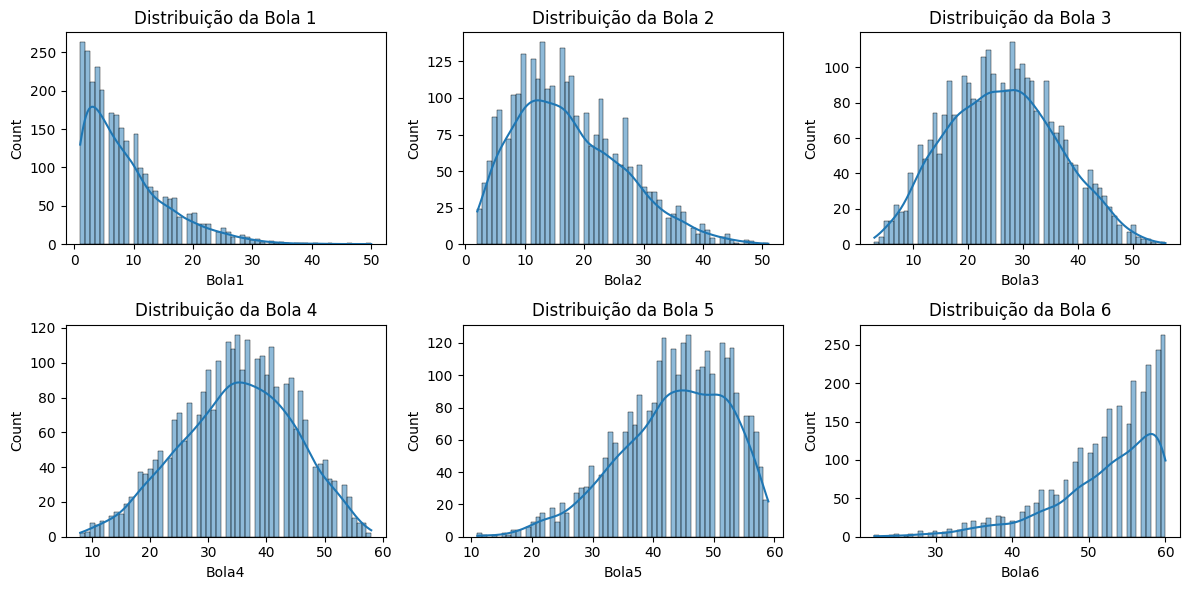

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análise univariada: distribuição dos números sorteados
plt.figure(figsize=(12, 6))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.histplot(df[f'Bola{i}'], bins=60, kde=True)
    plt.title(f'Distribuição da Bola {i}')
plt.tight_layout()
plt.show()

## 7. Insights Univariados, Bivariados e Multivariados

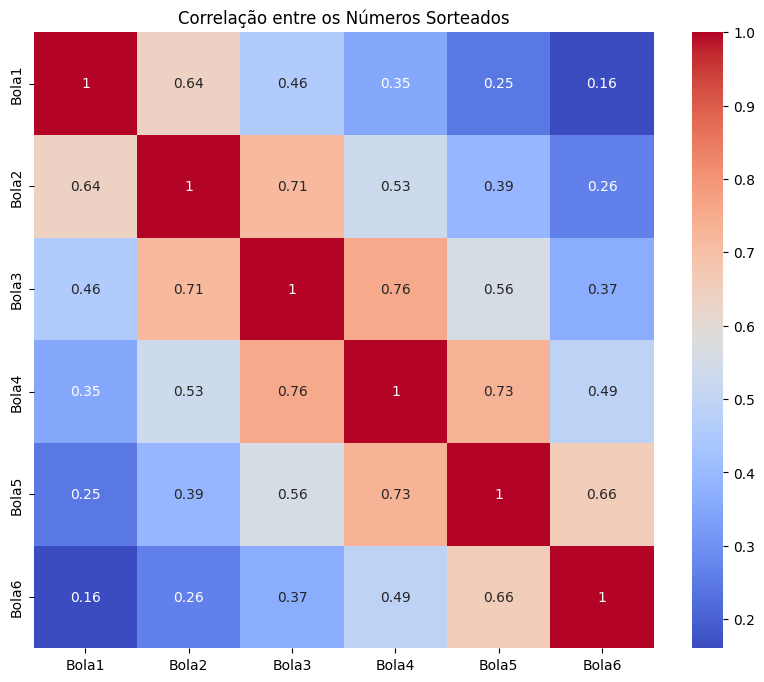

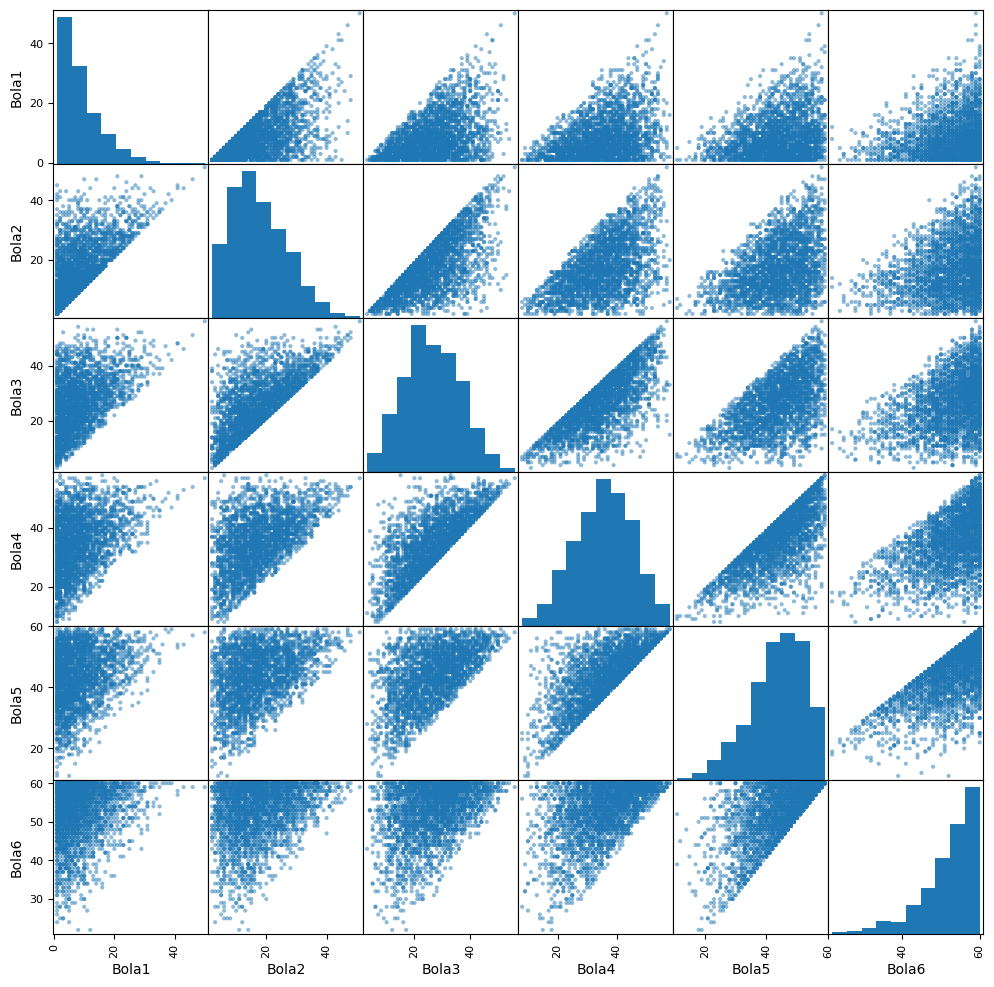

In [17]:
# Análise bivariada: correlação entre os números sorteados
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre os Números Sorteados')
plt.show()

# Insights multivariados
pd.plotting.scatter_matrix(df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']], figsize=(12, 12))
plt.show()

## 8. Análise de Componentes Principais (PCA)

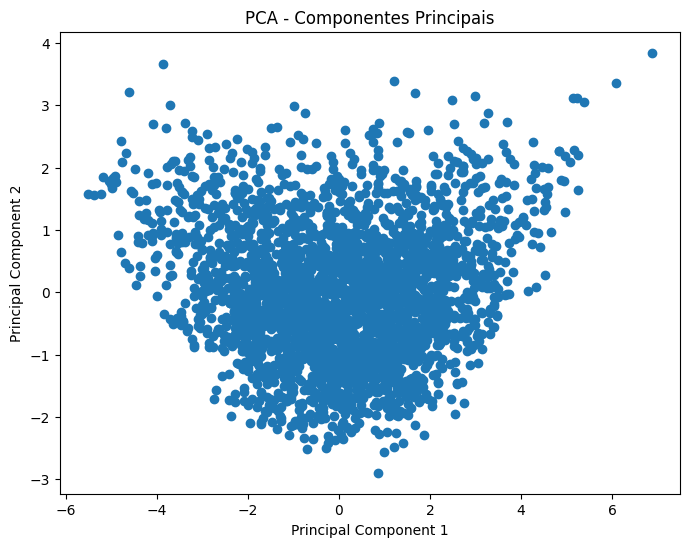

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Preparando os dados para PCA
numeros = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']]
scaler = StandardScaler()
numeros_scaled = scaler.fit_transform(numeros)

# Aplicando PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeros_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Visualizando os componentes principais
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Componentes Principais')
plt.show()

## 9. Contar a História dos Dados

Neste projeto, analisamos os dados históricos da Mega Sena para identificar padrões nos números sorteados. Utilizamos técnicas de análise exploratória de dados (EDA) e análise de componentes principais (PCA) para extrair insights significativos.

## 10. Filtros Aplicados aos Dados

In [19]:
# Aplicar filtros nos dados, se necessário
# Por exemplo, remover sorteios acumulados
df_filtered = df[df['Acumulado_6_Acertos'] == 0]

# Visualizar as primeiras linhas dos dados filtrados
df_filtered.head()

,Concurso,Data,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores_Sena,Cidade_UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado_6_Acertos,Arrecadacao_Total,Estimativa_Premio,Acumulado_Mega_da_Virada,Observacao


## 11. Distribuição e Dataset Final para Analisar

In [20]:
# Especificar as distribuições
distribuicoes = df_filtered.describe()

# Especificar relações entre variáveis
relacoes = df_filtered.corr()

distribuicoes, relacoes

(       Concurso Data  Bola1  Bola2  Bola3  Bola4  Bola5  Bola6  \
 count       0.0    0    0.0    0.0    0.0    0.0    0.0    0.0   
 mean        NaN  NaT    NaN    NaN    NaN    NaN    NaN    NaN   
 min         NaN  NaT    NaN    NaN    NaN    NaN    NaN    NaN   
 25%         NaN  NaT    NaN    NaN    NaN    NaN    NaN    NaN   
 50%         NaN  NaT    NaN    NaN    NaN    NaN    NaN    NaN   
 75%         NaN  NaT    NaN    NaN    NaN    NaN    NaN    NaN   
 max         NaN  NaT    NaN    NaN    NaN    NaN    NaN    NaN   
 std         NaN  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 
        Ganhadores_Sena  Ganhadores_Quina  Ganhadores_Quadra  
 count              0.0               0.0                0.0  
 mean               NaN               NaN                NaN  
 min                NaN               NaN                NaN  
 25%                NaN               NaN                NaN  
 50%                NaN               NaN                NaN  
 75%             

## 12. Seleção de Algoritmos Candidatos

Nesta fase, selecionaremos vários algoritmos candidatos para teste e avaliação. Esta seleção é baseada em algoritmos comuns para problemas de classificação e regressão, como:
- Regressão Linear
- Árvore de Decisão
- Random Forest
- Gradient Boosting
- Redes Neurais
- k-Nearest Neighbors (k-NN)
- Support Vector Machines (SVM)

Na próxima instância, testaremos esses algoritmos, avaliaremos seu desempenho e escolheremos o mais adequado para cada caso em particular.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Carregar os dados
file_path = 'Mega-Sena.xlsx'
df = pd.read_excel(file_path)

# Renomear colunas para facilitar o trabalho
df.columns = ['Concurso', 'Data', 'Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6', 
              'Ganhadores_Sena', 'Cidade_UF', 'Rateio_Sena', 'Ganhadores_Quina', 
              'Rateio_Quina', 'Ganhadores_Quadra', 'Rateio_Quadra', 'Acumulado_6_Acertos', 
              'Arrecadacao_Total', 'Estimativa_Premio', 'Acumulado_Mega_da_Virada', 
              'Observacao']

# Convertendo a coluna de data para o formato datetime
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Remover pontos e símbolos de real e converter colunas para numérico
colunas_monetarias = ['Rateio_Sena', 'Rateio_Quina', 'Rateio_Quadra', 'Acumulado_6_Acertos',
                      'Arrecadacao_Total', 'Estimativa_Premio', 'Acumulado_Mega_da_Virada']

for coluna in colunas_monetarias:
    df[coluna] = df[coluna].str.replace('R\$', '', regex=True).str.replace('.', '').str.replace(',', '.').astype(float)

# Verificar valores nulos e preenchê-los se necessário
df.fillna(0, inplace=True)

# Definir variável target e features
X = df[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']]
y = df['Rateio_Sena']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'k-NN': KNeighborsRegressor(),
    'Support Vector Machine': SVR()
}

# Treinar e avaliar modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Mostrar resultados
results_df = pd.DataFrame(results).T
print(results_df)

# Escolher o melhor modelo com base no RMSE
best_model_name = results_df['RMSE'].idxmin()
best_model = models[best_model_name]
print(f'O melhor modelo é: {best_model_name}')


                                RMSE           MAE        R2
Linear Regression       2.278040e+07  9.593452e+06  0.000085
Decision Tree           3.070817e+07  1.250805e+07 -0.816972
Random Forest           2.383297e+07  1.132495e+07 -0.094452
Gradient Boosting       2.317569e+07  9.759198e+06 -0.034918
k-NN                    2.427510e+07  1.043707e+07 -0.135435
Support Vector Machine  2.369992e+07  6.534192e+06 -0.082267
O melhor modelo é: Linear Regression


## 13. Importância do Storytelling

O Storytelling torna sua análise mais acessível e poderosa ao conectar os resultados ao problema de negócio e ao impacto real que eles têm. Dessa forma, você consegue não só compartilhar os dados, mas também guiar seu público para a ação baseada em insights valiosos.